In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
import seaborn as sns

%matplotlib inline

# Load the data, keeping only 10,000 of the most frequently occurring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


c:\users\prati\appdata\local\programs\python\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (5.2.0)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
# Convert the integer sequences into binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Vectorize training and testing data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

# Convert labels to float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Validation set
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Define the model architecture
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [3]:
# Train the model
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))


Epoch 1/20
30/30 [==============================] - 5s 137ms/step - loss: 0.5193 - binary_accuracy: 0.7851 - val_loss: 0.3978 - val_binary_accuracy: 0.8622
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3159 - binary_accuracy: 0.9016 - val_loss: 0.3158 - val_binary_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2320 - binary_accuracy: 0.9261 - val_loss: 0.2851 - val_binary_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1840 - binary_accuracy: 0.9407 - val_loss: 0.2734 - val_binary_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1520 - binary_accuracy: 0.9517 - val_loss: 0.2776 - val_binary_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1255 - binary_accuracy: 0.9632 - val_loss: 0.2930 - val_binary_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - lo

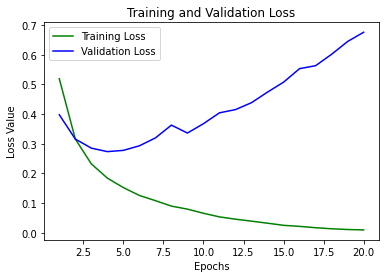

In [4]:
# Plotting losses
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()


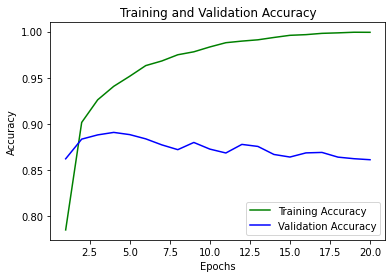

In [5]:
# Plotting accuracies
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


782/782 [==============================] - 2s 2ms/step - loss: 0.7408 - binary_accuracy: 0.8480
Test Loss: 0.7408326268196106
Test Accuracy: 0.848039984703064


In [7]:
# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

782/782 [==============================] - 2s 3ms/step


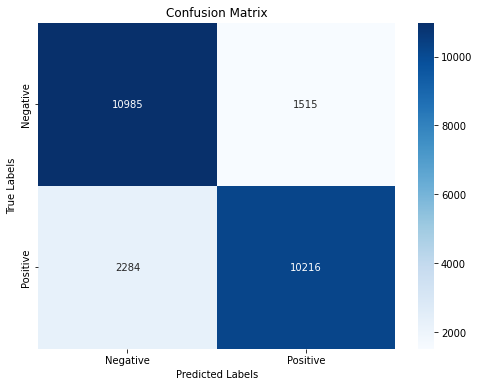

In [8]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Generate the classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85     12500
         1.0       0.87      0.82      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [10]:
# Use the model to predict probabilities for the positive class
y_score = model.predict(X_test)


782/782 [==============================] - 2s 2ms/step


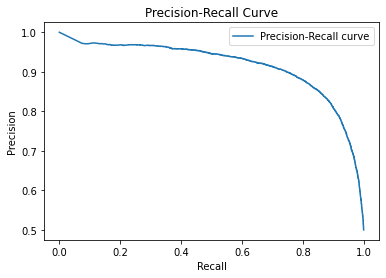

In [11]:
# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [12]:
# Select a random index from the test data
import random
random_index = random.randint(0, len(test_data) - 1)

# Get the comment and its corresponding label from the test data
comment = test_data[random_index]
actual_label = int(test_labels[random_index])

# Predict the sentiment of the comment
predicted_label = int(y_pred_binary[random_index])

# Decode the comment from integer sequence to words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_comment = ' '.join([reverse_word_index.get(i - 3, '?') for i in comment])

# Display the comment, actual label, and predicted label
print("Comment:", decoded_comment)
print("Actual Label:", "Positive" if actual_label == 1 else "Negative")
print("Predicted Label:", "Positive" if predicted_label == 1 else "Negative")


Comment: ? i watched 40 minutes and couldn't bear it any longer  the television went off and i returned to some light reading ? for ? br br it was hard to say what aspect of this production was most ? dialogue made up entirely of sound ? or the acting by numbers br br it was difficult to determine the period in which the drama was supposed to take place there were throw away references to lord nelson and slavery but edmund the ? to be played by blake was the only actor who one could believe inhabited the early 19th century the other bright young things had make up and costumes more appropriate to a 21st century fancy dress party the ? blonde ? ? ? being the least credible character br br uk commercial television obviously believes ? ? ? lips and deep meaningful looks make a good story fortunately jane austen had other ideas br br if you want to find out the story of ? park buy the 1983 mini series dvd
Actual Label: Negative
Predicted Label: Negative


In [13]:
# Independent comments
negative_comment = "This movie was terrible. The acting was awful, and the plot was boring."
positive_comment = "I absolutely loved this film! The performances were outstanding, and the storyline kept me engaged throughout."

# Tokenize the comments
negative_tokens = imdb.get_word_index()
negative_tokens = {k:(v+3) for k,v in negative_tokens.items()}
negative_tokens["<PAD>"] = 0
negative_tokens["<START>"] = 1
negative_tokens["<UNK>"] = 2

positive_tokens = imdb.get_word_index()
positive_tokens = {k:(v+3) for k,v in positive_tokens.items()}
positive_tokens["<PAD>"] = 0
positive_tokens["<START>"] = 1
positive_tokens["<UNK>"] = 2

# Convert the comments to sequences
negative_sequence = [negative_tokens[word] if word in negative_tokens else negative_tokens["<UNK>"] for word in negative_comment.split()]
positive_sequence = [positive_tokens[word] if word in positive_tokens else positive_tokens["<UNK>"] for word in positive_comment.split()]

# Vectorize the sequences
negative_vector = vectorize_sequences([negative_sequence])
positive_vector = vectorize_sequences([positive_sequence])

# Predict sentiments
negative_prediction = model.predict(negative_vector)
positive_prediction = model.predict(positive_vector)

# Print the predictions
print("Negative Comment Prediction:", "Positive" if negative_prediction[0][0] > 0.5 else "Negative")
print("Positive Comment Prediction:", "Positive" if positive_prediction[0][0] > 0.5 else "Negative")


1/1 [==============================] - 0s 24ms/step
Negative Comment Prediction: Negative
Positive Comment Prediction: Positive
